# Will that customer leave?

## Business Problem

#### A company is facing a problem, suddenly large number of it's customers are leaving or breaking ties with the company, The company wants to figure out what is going wrong, and which customer wil more likely exit so to target these customers and give them good schemes and providing better service especially to these customers so that they might change their minds.

#### What the company wants from thier data scientist is to find out these target customers. 

## Importing Libraries

In [18]:
"""
Created on Tue Mar 20 00:58:55 2018

@author: atul
"""
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
import seaborn as sns

## Importing the dataset

In [6]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

In [7]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


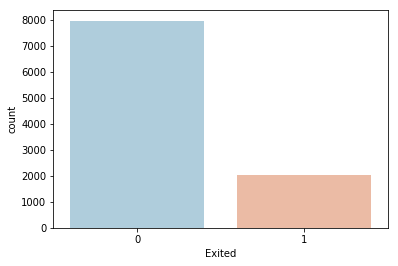

In [20]:
sns.countplot(x = 'Exited', data = dataset, palette = 'RdBu_r')
plt.show()

#### Almost 2000 people has already exited

## Encoding categorical data

In [8]:
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]

## Splitting the dataset into the Training set and Test set

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [10]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
X_train

array([[-0.5698444 ,  1.74309049,  0.16958176, ...,  0.64259497,
        -1.03227043,  1.10643166],
       [ 1.75486502, -0.57369368, -2.30455945, ...,  0.64259497,
         0.9687384 , -0.74866447],
       [-0.5698444 , -0.57369368, -1.19119591, ...,  0.64259497,
        -1.03227043,  1.48533467],
       ...,
       [-0.5698444 , -0.57369368,  0.9015152 , ...,  0.64259497,
        -1.03227043,  1.41231994],
       [-0.5698444 ,  1.74309049, -0.62420521, ...,  0.64259497,
         0.9687384 ,  0.84432121],
       [ 1.75486502, -0.57369368, -0.28401079, ...,  0.64259497,
        -1.03227043,  0.32472465]])

## Initialising the ANN

In [ ]:
classifier = Sequential()

## Adding the input layers and first hidden layer

In [ ]:
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11 ))

## Second Hidden Layer

In [ ]:
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

## Output Layer

In [ ]:
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

## Compiling the ANN

In [ ]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) # adam - stochastic gradient descent , binary_crossentropy is logrithmic loss for classifying two types 

## Fitting the ANN to training set

In [12]:
print(classifier.summary())
classifier.fit(X_train, y_train, batch_size = 10, epochs = 20)

/home/atul/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/atul/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
8000/8000 [==============================] - 19s 2ms/step - loss: 0.4879 - acc: 0.7957
Epoch 2/20
8000/8000 [==============================] - 4s 499us/step - loss: 0.4286 - acc: 0.7960
Epoch 3/20
8000/8000 [==============================] - 4s 511us/step - loss: 0.4228 - acc: 0.7960
Epoch 4/20
8000/8000 [==============================] - 4s 509us/step - loss: 0.4187 - acc: 0.8187
Epoch 5/

## Predicting the Test set results

In [13]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)

In [14]:
cm

array([[1537,   58],
       [ 250,  155]])